In [1]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import math
from numpy import sqrt 

In [10]:
time = pd.read_csv(r"C:\Aalesh and Mandar\Datasets\raw_sales.csv",parse_dates=['datesold'])

In [11]:
time.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [5]:
time.shape

(29580, 5)

In [15]:
time["year"] = time["datesold"].dt.year
time["month"] = time["datesold"].dt.month

In [27]:
total_sales=time.groupby(['year','month'])['price'].sum()

In [29]:
total_sales = total_sales.reset_index()
total_sales.head()

,index,year,month,price
0,0,2007,2,815000
1,1,2007,3,1018000
2,2,2007,4,2394000
3,3,2007,5,679000
4,4,2007,6,3122000


In [34]:
total_sales.head()

,index,year,month,price
0,0,2007,2,815000
1,1,2007,3,1018000
2,2,2007,4,2394000
3,3,2007,5,679000
4,4,2007,6,3122000


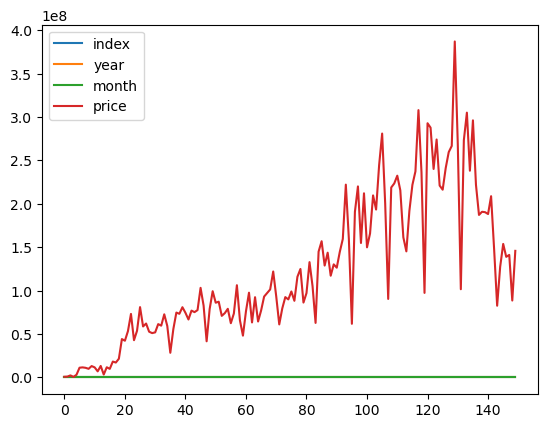

In [35]:
total_sales.plot()
plt.show()

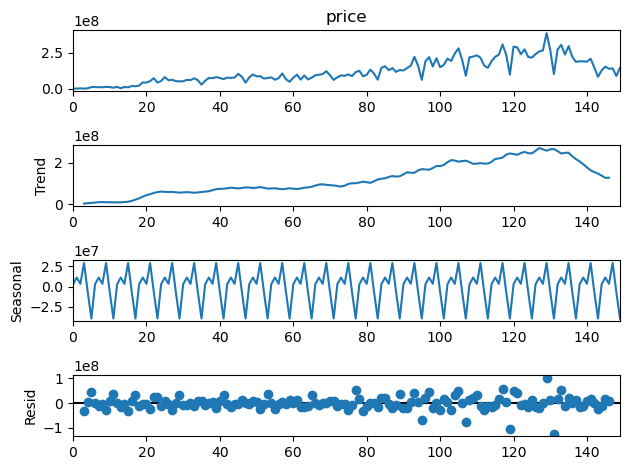

In [36]:
result = seasonal_decompose(total_sales["price"], model = "additive", period = 6)
result.plot()
plt.show()

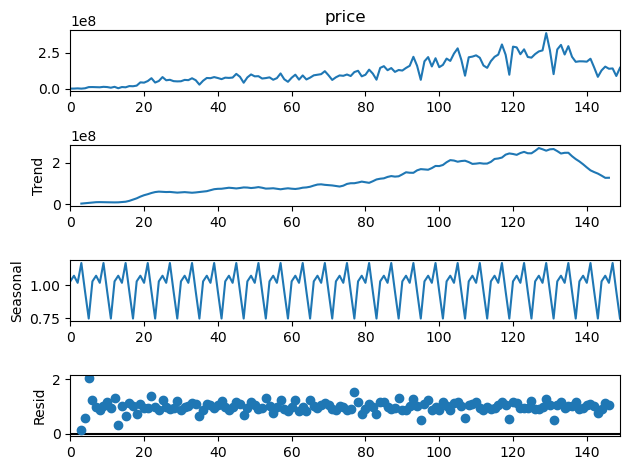

In [40]:
result = seasonal_decompose(total_sales["price"], model = "multiplicative", period = 6)
result.plot()
plt.show()

In [37]:
y = total_sales["price"]
y_train = y[:-6]
y_test = y[-6:]

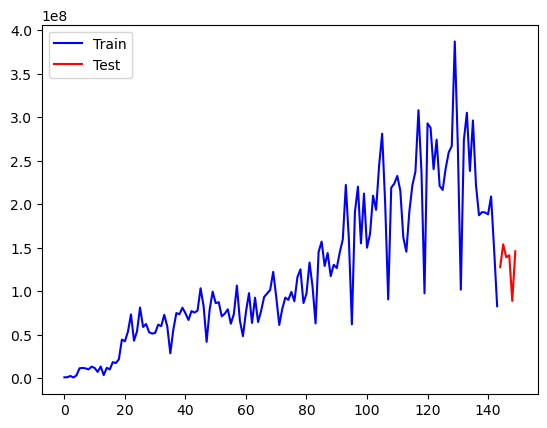

In [39]:
plt.plot(y_train, color="blue", label="Train")
plt.plot(y_test, color="red", label="Test")
plt.legend(loc="best")
plt.show()

## Auto Reg

In [41]:
model = AutoReg(y_train, lags=5)
model_fit = model.fit()
print("Coefficient: " % model_fit.params)

Coefficient: 


In [42]:
pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)

In [43]:
error = mean_squared_error(y_test, pred)
print("Test RMSE: %0.3f" % sqrt(error))

Test RMSE: 30807059.511


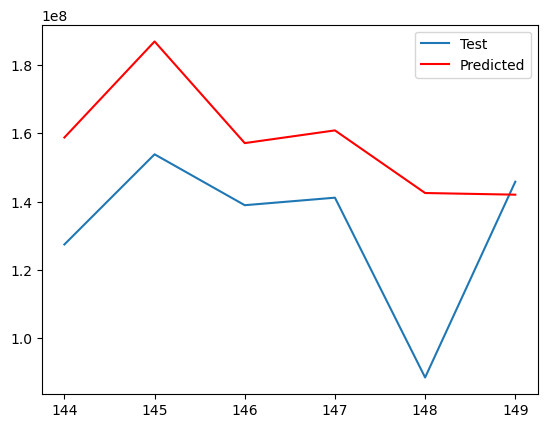

In [44]:
plt.plot(y_test, label="Test")
plt.plot(pred, color="red", label="Predicted")
plt.legend(loc="best")
plt.show()

## ARIMA

In [45]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
model = ARIMA(y_train, order = (4,1,2))
model_fit = model.fit()
print("Coefficient: " % model_fit.params)

Coefficient: 


In [47]:
pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)

In [48]:
error = mean_squared_error(y_test, pred)
print("Test RMSE: %0.3f" % sqrt(error))

Test RMSE: 34860655.268


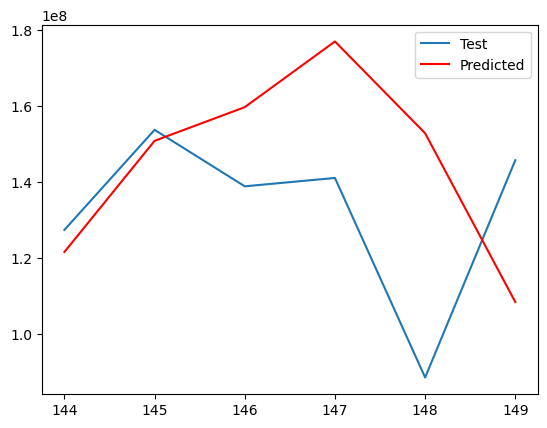

In [49]:
plt.plot(y_test, label="Test")
plt.plot(pred, color="red", label="Predicted")
plt.legend(loc="best")
plt.show()

## Auto Arima

In [50]:
from pmdarima.arima import auto_arima

In [51]:
model = auto_arima(y_train, trace = True, error_action="ignore", suppress_warnings=True)

forecast =model.predict(n_periods = len(y_test))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5390.795, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5462.796, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5456.274, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5420.794, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5460.821, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5402.966, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5398.474, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5392.081, Time=0.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5385.420, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5385.312, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5384.304, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5426.270, Time=0.05 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=5377.266, Time=0.18 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : 

In [58]:
error = mean_squared_error(y_test, pred)
print("Test RMSE: %0.3f" % sqrt(error))

Test RMSE: 34860655.268


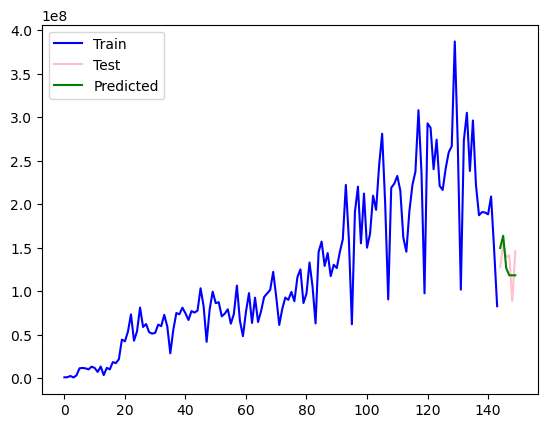

In [52]:
plt.plot(y_train, label="Train", color="blue")
plt.plot(y_test, label="Test", color="Pink")
plt.plot(forecast, color="Green", label="Predicted")
plt.legend(loc="best")
plt.show()

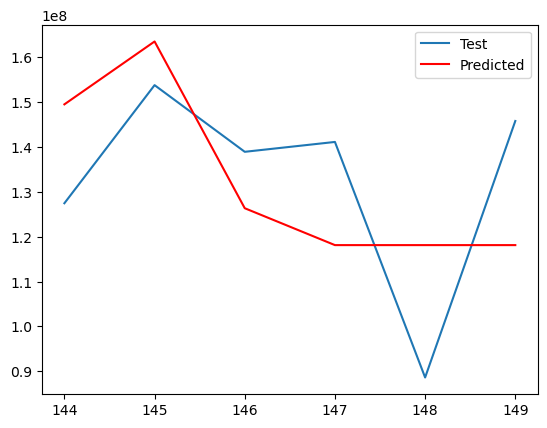

In [53]:
plt.plot(y_test, label="Test")
plt.plot(forecast, color="red", label="Predicted")
plt.legend(loc="best")
plt.show()

## SARIMA

In [54]:
from pmdarima.arima import auto_arima

In [55]:
model = auto_arima(y_train, trace = True, error_action="ignore", suppress_warnings=True, seasonal=True, m=12)

forecast =model.predict(n_periods = len(y_test))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=4970.595, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4876.471, Time=0.18 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4913.805, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=5000.421, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=4888.752, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=4877.633, Time=0.58 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=4877.560, Time=0.19 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=4876.366, Time=0.13 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=4876.472, Time=0.33 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=4878.460, Time=0.50 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=4963.595, Time=0.10 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=4876.279, Time=0.17 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=4888.020, Time=0.05 sec
 ARIMA(2,0,0)(1,1,1)[12]

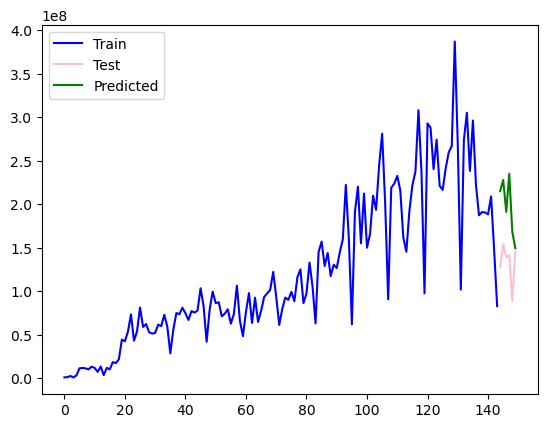

In [56]:
plt.plot(y_train, label="Train", color="blue")
plt.plot(y_test, label="Test", color="Pink")
plt.plot(forecast, color="Green", label="Predicted")
plt.legend(loc="best")
plt.show()

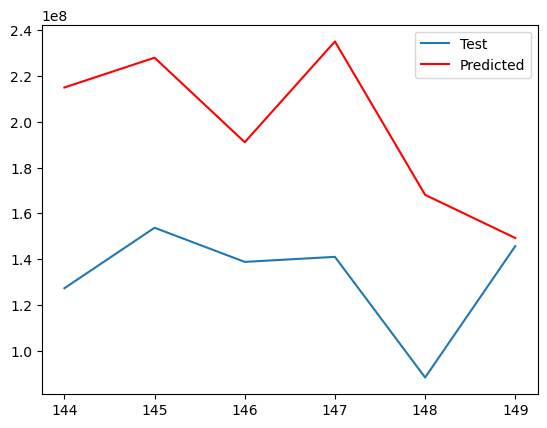

In [57]:
plt.plot(y_test, label="Test")
plt.plot(forecast, color="red", label="Predicted")
plt.legend(loc="best")
plt.show()